# Multivariate analysis of Kansas Oil Activity, Production and Economic Indicators
The purpose of this notebook is to see if we can find any correlation between well activity (wells permitted, spud, completed, or plugged), oil production and economic indicators on a monthly and county-by-county basis

In [2]:
import pandas as pd
import numpy as np

In [3]:
# Load data

# Montly well activity
well_activity = pd.read_csv('../../../casestudy_data/group_2/monthly_well_activity.csv', dtype={'year':np.int32, 'month':np.int32}).rename(columns={
    'county' : 'COUNTY',
    'year' : 'YEAR',
    'month' : 'MONTH'
})
well_activity.head()

,COUNTY,YEAR,MONTH,PERMIT_COUNT,SPUD_COUNT,COMPLETION_COUNT,PLUGGING_COUNT
0,Allen,1930,1,1,NaN,NaN,NaN
1,Allen,1956,6,3,2.0,2.0,NaN
2,Allen,1956,8,2,4.0,4.0,NaN
3,Allen,1956,9,1,2.0,3.0,NaN
4,Allen,1956,10,3,2.0,3.0,NaN


In [4]:
well_activity.isna().sum()

COUNTY                  0
YEAR                    0
MONTH                   0
PERMIT_COUNT            0
SPUD_COUNT           4560
COMPLETION_COUNT     6222
PLUGGING_COUNT      15118
dtype: int64

In [5]:
# These nans should be zeros
well_activity = well_activity.fillna(0)
well_activity['SPUD_COUNT'] = well_activity['SPUD_COUNT'].astype(np.int32)
well_activity['COMPLETION_COUNT'] = well_activity['COMPLETION_COUNT'].astype(np.int32)
well_activity['PLUGGING_COUNT'] = well_activity['PLUGGING_COUNT'].astype(np.int32)
well_activity.head()

,COUNTY,YEAR,MONTH,PERMIT_COUNT,SPUD_COUNT,COMPLETION_COUNT,PLUGGING_COUNT
0,Allen,1930,1,1,0,0,0
1,Allen,1956,6,3,2,2,0
2,Allen,1956,8,2,4,4,0
3,Allen,1956,9,1,2,3,0
4,Allen,1956,10,3,2,3,0


In [6]:
# Monthly production 
production = pd.read_csv('../../../casestudy_data/group_2/kgs_production_data/county/monthly/county_production_monthly.csv').rename(columns ={
    ' YEAR' : 'YEAR', ' MONTH' : 'MONTH', ' OIL_WELLS' : 'OIL_WELLS', ' GAS_WELLS' : 'GAS_WELLS'
})
production = production.drop(columns = ['Unnamed: 0'])
production.head()

,COUNTY,YEAR,MONTH,OIL_PRODUCTION,OIL_WELLS,GAS_PRODUCTION,GAS_WELLS,DATE
0,Allen,2000,1,19390.0,1925.0,20724.0,38.0,2000-01-01
1,Allen,2000,2,20010.0,1925.0,29596.0,38.0,2000-02-01
2,Allen,2000,3,18158.0,1925.0,20534.0,38.0,2000-03-01
3,Allen,2000,4,18225.0,1925.0,16695.0,38.0,2000-04-01
4,Allen,2000,5,19526.0,1925.0,11399.0,38.0,2000-05-01


In [7]:
# Unemployement data
unemployement = pd.read_csv('../../../casestudy_data/Kansas_Unemployment_monthly.csv').drop(columns = ['Unnamed: 0']).rename(columns = {'County' :'COUNTY'})
unemployement.head()

,COUNTY,Time,Labor_Force,Employed,Unemployed,Unemployment
0,Allen,2010-11-01,7140,6535,605,8.5
1,Allen,2000-01-01,7185,6820,365,5.1
2,Allen,2000-02-01,7192,6867,325,4.5
3,Allen,2000-03-01,7243,6920,323,4.5
4,Allen,2000-04-01,7323,7030,293,4.0


In [8]:
# Need to transform a little to join to with other datasets
unemployement['Time'] = pd.to_datetime(unemployement['Time'])
unemployement['YEAR'] = unemployement['Time'].dt.year 
unemployement['MONTH'] = unemployement['Time'].dt.month
unemployement.head()


,COUNTY,Time,Labor_Force,Employed,Unemployed,Unemployment,YEAR,MONTH
0,Allen,2010-11-01,7140,6535,605,8.5,2010,11
1,Allen,2000-01-01,7185,6820,365,5.1,2000,1
2,Allen,2000-02-01,7192,6867,325,4.5,2000,2
3,Allen,2000-03-01,7243,6920,323,4.5,2000,3
4,Allen,2000-04-01,7323,7030,293,4.0,2000,4


In [9]:
# Trim off some data based on years we have available
well_activity = well_activity[well_activity['YEAR'] >= 1990]
well_activity.shape

(18072, 7)

In [10]:
production = production[production['YEAR'] >= 1990]
production.shape

(36216, 8)

In [11]:
# Set common index so we can join
well_activity = well_activity.set_index(['COUNTY', 'YEAR', 'MONTH'])
production = production.set_index(['COUNTY', 'YEAR', 'MONTH'])
unemployement = unemployement.set_index(['COUNTY', 'YEAR', 'MONTH'])

In [12]:
# Join to one dataframe
df = well_activity.join(production).join(unemployement)
df.head(20)

PERMIT_COUNT  SPUD_COUNT  COMPLETION_COUNT  PLUGGING_COUNT  \
COUNTY YEAR MONTH                                                               
Allen  1990 1                 7           8                 8              32   
            2                 7           6                 7              25   
            3                 7           4                 6              10   
            4                14          11                 9               9   
            5                 6          13                13              14   
            6                 3           4                 5               6   
            7                 5           6                 5              28   
            8                17          14                12               8   
            9                15          10                18              29   
            10               19          19                11              17   
            11                9          16                23              11   
            12               22          11                 5               7   
       1991 1                 7          13                11               2   
            2                 7          16                18              33   
            3                 7           7                 9              47   
            4                10          10                 8               4   
            5                 3           5                 8               0   
            6                17           7                 5              11   
            7                 2          14                18               5   
            8                17          18                 4               4   

                   OIL_PRODUCTION  OIL_WELLS  GAS_PRODUCTION  GAS_WELLS  \
COUNTY YEAR MONTH                                                         
Allen  1990 1             46552.0     1420.0          5196.0       11.0   
            2             38095.0     1420.0          5465.0       11.0   
            3             42347.0     1420.0          4944.0       11.0   
            4             42569.0     1420.0          6243.0       11.0   
            5             42596.0     1420.0          5955.0       11.0   
            6             40655.0     1420.0          4922.0       11.0   
            7             42160.0     1420.0          5450.0       11.0   
            8             45351.0     1420.0          5622.0       11.0   
            9             42873.0     1420.0          5051.0       11.0   
            10            44875.0     1420.0          3836.0       11.0   
            11            44622.0     1420.0          3431.0       11.0   
            12            39872.0     1420.0          3553.0       11.0   
       1991 1             39845.0     1469.0          3878.0        8.0   
            2             41995.0     1469.0          3509.0        8.0   
            3             47955.0     1469.0          3758.0        8.0   
            4             47882.0     1469.0          3182.0        8.0   
            5             45431.0     1469.0          2880.0        8.0   
            6             43673.0     1469.0          3699.0        8.0   
            7             46407.0     1469.0          4127.0        8.0   
            8             46148.0     1469.0          3018.0        8.0   

                         DATE       Time  Labor_Force  Employed  Unemployed  \
COUNTY YEAR MONTH                                                             
Allen  1990 1      1990-01-01 1990-01-01       6860.0    6391.0       469.0   
            2      1990-02-01 1990-02-01       6750.0    6351.0       399.0   
            3      1990-03-01 1990-03-01       6875.0    6422.0       453.0   
            4      1990-04-01 1990-04-01       7085.0    6713.0       372.0   
            5      1990-05-01 1990-05-01       7044.0    6712.0       332.0   
            6      1990-06-01 19

In [13]:
# Let's also join oil price
oil_prices = pd.read_csv('../../../casestudy_data/group_2/Monthly_Oil_Prices_EIA.csv')
oil_prices['Date'] = pd.to_datetime(oil_prices['Date']).astype(str)
oil_prices = oil_prices.set_index('Date')
oil_prices = oil_prices.to_dict()
oil_prices = oil_prices['Cushing, OK WTI Spot Price FOB (Dollars per Barrel)'] # Reduce dim


In [14]:
# Create an empty series to fill with oil prices
df['oil_price'] = pd.Series(dtype='float64')

In [15]:
import numpy as np 
# Iterate thru df and match date field to oil price dict
i = 0 
for index, row in df.iterrows():
    try:
        if row['DATE'] == 'nan':
            df.iloc[i,-1] = np.nan
        else: 
            df.iloc[i,-1] = oil_prices[row['DATE']]
    except KeyError:
        df.iloc[i,-1] = np.nan
    i += 1        

In [16]:
df['oil_price']

COUNTY     YEAR  MONTH
Allen      1990  1        22.86
                 2        22.11
                 3        20.39
                 4        18.43
                 5        18.20
                          ...  
Woodson    2020  9        39.63
                 10       39.40
                 11       40.94
                 12       47.02
Wyandotte  1996  6        20.42
Name: oil_price, Length: 18072, dtype: float64

In [17]:
# Create a correlation matrix using pandas
corr_matrix = df.corr()
corr_matrix

,PERMIT_COUNT,SPUD_COUNT,COMPLETION_COUNT,PLUGGING_COUNT,OIL_PRODUCTION,OIL_WELLS,GAS_PRODUCTION,GAS_WELLS,Labor_Force,Employed,Unemployed,Unemployment,oil_price
PERMIT_COUNT,1.000000,0.753725,0.666064,0.228534,0.081798,0.278237,0.041491,0.086501,0.052963,0.052580,0.058463,0.175986,0.212314
SPUD_COUNT,0.753725,1.000000,0.871415,0.274734,0.156004,0.302688,0.095981,0.159489,0.038703,0.038336,0.044591,0.154239,0.216126
COMPLETION_COUNT,0.666064,0.871415,1.000000,0.294097,0.171812,0.307530,0.110236,0.177054,0.032558,0.032188,0.038834,0.146405,0.214936
PLUGGING_COUNT,0.228534,0.274734,0.294097,1.000000,0.165103,0.405007,-0.107315,-0.059723,-0.008475,-0.008698,-0.003196,0.166617,-0.026932
OIL_PRODUCTION,0.081798,0.156004,0.171812,0.165103,1.000000,0.478198,0.200440,0.172783,-0.062659,-0.061562,-0.083088,-0.198606,-0.043224
OIL_WELLS,0.278237,0.302688,0.307530,0.405007,0.478198,1.000000,-0.237985,-0.202391,0.009240,0.009128,0.011160,0.278577,0.028643
GAS_PRODUCTION,0.041491,0.095981,0.110236,-0.107315,0.200440,-0.237985,1.000000,0.734683,-0.091767,-0.091247,-0.098184,-0.223099,-0.172848
GAS_WELLS,0.086501,0.159489,0.177054,-0.059723,0.172783,-0.202391,0.734683,1.000000,-0.120069,-0.119930,-0.116729,-0.083551,0.072736
Labor_Force,0.052963,0.038703,0.032558,-0.008475,-0.062659,0.009240,-0.091767,-0.120069,1.000000,0.999895,0.949620,0.070095,0.015964
Employed,0.052580,0.038336,0.032188,-0.008698,-0.061562,0.009128,-0.091247,-0.119930,0.999895,1.000000,0.944978,0.065446,0.014425


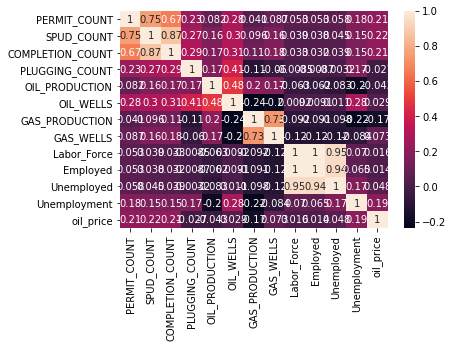

In [18]:
import seaborn as sn 
import matplotlib.pyplot as plt 

sn.heatmap(corr_matrix, annot=True)
plt.show()

In [19]:
def get_corr_matrix_by_county(df, county):
    return df.loc[df.index.get_level_values('COUNTY') == county].corr()

In [20]:
def filter_to_signf_corr(corr_matrix, r2_thresh):
    # Known correlations to ignore
    ignore = {
    'Unemployed' : ['Unemployment', 'Employed'],
    'Unemployment' : ['Unemployed'],
    'Employed' : ['Unemployed', 'Unemployment', 'Labor_Force'],
    'Labor_Force' : ['Employed', 'Unemployed'],
    }   

    target = ['Labor_Force', 'Employed', 'Unemployed', 'Unemployment', 'oil_price']

    for row in corr_matrix.itertuples():
        row_name = row[0]
        i = 1 # Skip first value
        while i < len(row):
            col_name = corr_matrix.columns[i-1]
            r2 = row[i] # The r2 value
            if np.isnan(r2) or abs(r2) < r2_thresh or abs(round(r2,2)) == 1.0:
                pass
            elif row_name not in target:
                pass 
            elif row_name in ignore.keys() and col_name in ignore[row_name]:
                pass 
            else:
                print(f'\t{row_name, col_name, r2}')
            i += 1


In [21]:
filter_to_signf_corr(corr_matrix, .5)


	('Unemployed', 'Labor_Force', 0.9496196198418346)


In [22]:
df.index.levels[0]

Index(['Allen', 'Anderson', 'Atchison', 'Barber', 'Barton', 'Bourbon', 'Brown',
       'Butler', 'Chase', 'Chautauqua', 'Cherokee', 'Cheyenne', 'Clark',
       'Clay', 'Coffey', 'Comanche', 'Cowley', 'Crawford', 'Decatur',
       'Dickinson', 'Doniphan', 'Douglas', 'Edwards', 'Elk', 'Ellis',
       'Ellsworth', 'Finney', 'Ford', 'Franklin', 'Geary', 'Gove', 'Graham',
       'Grant', 'Gray', 'Greeley', 'Greenwood', 'Hamilton', 'Harper', 'Harvey',
       'Haskell', 'Hodgeman', 'Jackson', 'Jefferson', 'Johnson', 'Kearny',
       'Kingman', 'Kiowa', 'Labette', 'Lane', 'Leavenworth', 'Lincoln', 'Linn',
       'Logan', 'Lyon', 'Marion', 'McPherson', 'Meade', 'Miami', 'Mitchell',
       'Montgomery', 'Morris', 'Morton', 'Nemaha', 'Neosho', 'Ness', 'Norton',
       'Osage', 'Osborne', 'Ottawa', 'Pawnee', 'Phillips', 'Pottawatomie',
       'Pratt', 'Rawlins', 'Reno', 'Rice', 'Riley', 'Rooks', 'Rush', 'Russell',
       'Saline', 'Scott', 'Sedgwick', 'Seward', 'Sheridan', 'Sherman', 'Smith',
    

In [25]:
counties = df.index.levels[0].unique()
target_counties = ['Miami', 'Montgomery', 'Allen', 'Ellis', 'Woodson', 'Anderson', 'Wilson', ' Neosho']

for county in counties:
    if county in target_counties:
        print(county)
        corr_matrix = get_corr_matrix_by_county(df, county)
        filter_to_signf_corr(corr_matrix, .5)


Allen
	('oil_price', 'GAS_WELLS', 0.8416654348739583)
Anderson
	('Labor_Force', 'OIL_WELLS', 0.5069298562779547)
	('Labor_Force', 'GAS_WELLS', -0.6621502356106084)
	('Labor_Force', 'oil_price', 0.6996246651522672)
	('Employed', 'OIL_PRODUCTION', -0.554877311435577)
	('Employed', 'OIL_WELLS', 0.6139361773122467)
	('Employed', 'GAS_WELLS', -0.5058740565019135)
	('Employed', 'oil_price', 0.6889930571594213)
	('oil_price', 'OIL_WELLS', 0.5716602804233827)
	('oil_price', 'GAS_WELLS', 0.5029542933741706)
	('oil_price', 'Labor_Force', 0.6996246651522672)
	('oil_price', 'Employed', 0.6889930571594213)
Ellis
	('Labor_Force', 'oil_price', 0.6900110882233448)
	('Employed', 'oil_price', 0.683233072566611)
	('oil_price', 'PERMIT_COUNT', 0.6674921563149931)
	('oil_price', 'SPUD_COUNT', 0.6387536241972241)
	('oil_price', 'COMPLETION_COUNT', 0.6399200706338511)
	('oil_price', 'GAS_WELLS', 0.7908771128994282)
	('oil_price', 'Labor_Force', 0.6900110882233448)
	('oil_price', 'Employed', 0.683233072566611

In [29]:
viz_target = ['Labor_Force', 'Employed', 'oil_price', 'PERMIT_COUNT', 'SPUD_COUNT', 'COMPLETION_COUNT']

<AxesSubplot:xlabel='COUNTY,YEAR,MONTH'>

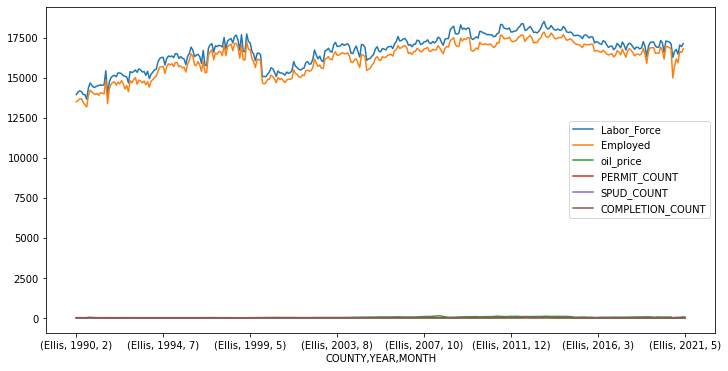

In [40]:
ellis = df[viz_target].filter(like='Ellis', axis=0)
ellis.plot(figsize=(12,6))

In [41]:
ellis = ellis.reset_index().drop(columns=['COUNTY'])
ellis['date'] = ellis['YEAR'].astype('str') + "-" + ellis['MONTH'].astype('str') + "-01"
ellis['date'] = pd.to_datetime(ellis['date'])
ellis['date']

0     1990-02-01
1     1990-03-01
2     1990-04-01
3     1990-05-01
4     1990-06-01
         ...    
346   2020-09-01
347   2020-10-01
348   2021-02-01
349   2021-04-01
350   2021-05-01
Name: date, Length: 351, dtype: datetime64[ns]

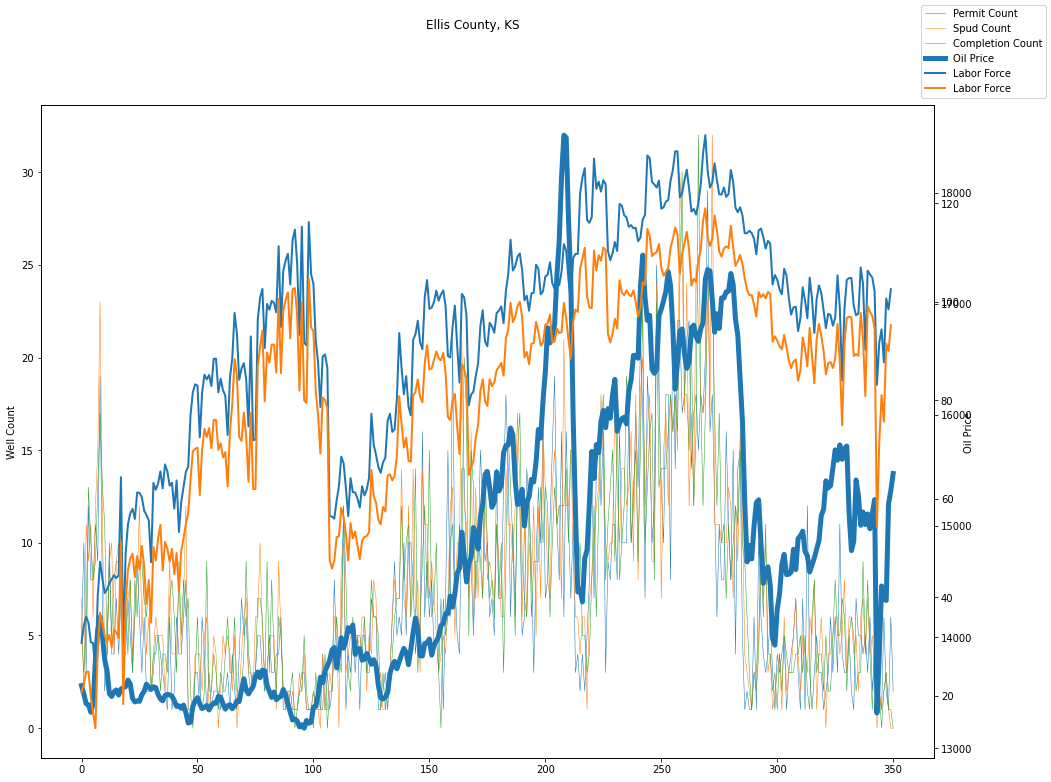

In [72]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax1 = plt.subplots(figsize=(16, 12))
ax1.plot(ellis['PERMIT_COUNT'], linewidth=.5, label='Permit Count')
ax1.plot(ellis['SPUD_COUNT'], linewidth=.5,label='Spud Count')
ax1.plot(ellis['COMPLETION_COUNT'], linewidth=.5,label='Completion Count')
ax1.set_ylabel('Well Count')

ax2 = ax1.twinx()
ax2.plot(ellis['oil_price'], linewidth=5, label='Oil Price')
ax2.set_ylabel('Oil Price')


ax3 = ax1.twinx()
ax3.plot(ellis['Labor_Force'], linewidth=2, label='Labor Force')
ax3.plot(ellis['Employed'], linewidth=2, label='Labor Force')



fig.legend()

fig.suptitle('Ellis County, KS')
plt.show()

In [77]:
# Output df for easy use later
df.to_csv('../../../casestudy_data/group_2/mv_join.csv')